## <font size=5> <strong> Disease Prediction based on symptoms
 

## I. Importing essential libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'data.csv', 'test1.csv', 'sample_data']


In [87]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [88]:
import pandas as pd
dataset = pd.read_csv('data.csv', encoding= 'unicode_escape')

## II. Importing and understanding our dataset 

In [89]:
#dataset = pd.read_csv("data.csv")

#### Verifying it as a 'dataframe' object in pandas

In [90]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [91]:
dataset.shape

(293, 20)

#### Printing out a few columns

In [92]:
dataset.head(5)

SL.NO            Name  Age  ... Neurologist Cardiothoracic surgeon  target
0      1    Mayuri Patil   23  ...           0                      0       1
1      2   Sangita Patil   46  ...           0                      1       1
2      3  Satyawan Nikam   38  ...           0                      0       1
3      4     Nutan Nikam   31  ...           0                      0       1
4      5   Pramila Patil   63  ...           0                      1       1

[5 rows x 20 columns]

In [93]:
dataset.sample(5)

SL.NO                    Name  ...  Cardiothoracic surgeon target
134    135    Anushka Pankaj Salve  ...                       0      1
73      74  HARSHAD SUNIL WANKHEDE  ...                       0      1
164    165       Sumit Arun Jadhav  ...                       1      1
124    125    CHETAN SHRAWAN GAVIT  ...                       0      1
252    253         VAIBHAV BAHIRAM  ...                       0      0

[5 rows x 20 columns]

#### Description

In [94]:
dataset.describe()

SL.NO         Age  ...  Cardiothoracic surgeon      target
count  293.000000  293.000000  ...              293.000000  293.000000
mean   147.000000   33.494881  ...                0.208191    0.563140
std     84.726029   18.798794  ...                0.406709    0.496846
min      1.000000    2.000000  ...                0.000000    0.000000
25%     74.000000   22.000000  ...                0.000000    0.000000
50%    147.000000   31.000000  ...                0.000000    1.000000
75%    220.000000   51.000000  ...                0.000000    1.000000
max    293.000000   80.000000  ...                1.000000    1.000000

[8 rows x 17 columns]

In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   SL.NO                   293 non-null    int64 
 1   Name                    293 non-null    object
 2   Age                     293 non-null    int64 
 3   City                    293 non-null    object
 4   Blood Group             293 non-null    object
 5   Cardiologist            293 non-null    int64 
 6   Audiologist             293 non-null    int64 
 7   Dentist                 293 non-null    int64 
 8   ENT specialist          293 non-null    int64 
 9   Gynaecologist           293 non-null    int64 
 10  Orthopaedic surgeon     293 non-null    int64 
 11  Paediatrician           293 non-null    int64 
 12   Psychiatrists          293 non-null    int64 
 13  Radiologist             293 non-null    int64 
 14  Pulmonologist           293 non-null    int64 
 15  Endocr

In [96]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [97]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

SL.NO:			age
Name:			1: male, 0: female
Age:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
City:			resting blood pressure
Blood Group:			 serum cholestoral in mg/dl
Cardiologist:			fasting blood sugar > 120 mg/dl
Audiologist:			resting electrocardiographic results (values 0,1,2)
Dentist:			 maximum heart rate achieved
ENT specialist:			exercise induced angina
Gynaecologist:			oldpeak = ST depression induced by exercise relative to rest
Orthopaedic surgeon:			the slope of the peak exercise ST segment
Paediatrician:			number of major vessels (0-3) colored by flourosopy
 Psychiatrists:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [98]:
dataset["target"].describe()

count    293.000000
mean       0.563140
std        0.496846
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [99]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [100]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target                    1.000000
SL.NO                     0.859098
Radiologist               0.026431
Cardiothoracic surgeon    0.022905
Orthopaedic surgeon       0.022064
ENT specialist            0.021897
 Psychiatrists            0.016877
Endocrinologist           0.013443
Neurologist               0.009792
Dentist                   0.009204
Age                       0.009040
Audiologist               0.008179
Cardiologist              0.005835
Gynaecologist             0.003654
Pulmonologist             0.003394
Paediatrician             0.000452
 Oncologist                    NaN
Name: target, dtype: float64


In [101]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    165
0    128
Name: target, dtype: int64


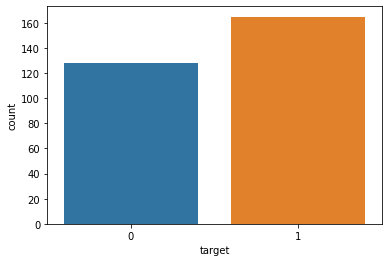

In [102]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [103]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 42.24
Percentage of patience with heart problems: 54.46


### We'll analyse 'age', 'Dentist', and 'Blood Group' features

### Analysing the 'Age' feature

In [104]:
dataset["Age"].unique()

array([23, 46, 38, 31, 63, 10,  8, 19, 56, 80,  6,  2, 41, 50, 60, 22, 58,
       24, 43, 52, 35,  4, 25, 51, 55, 28, 26, 54, 33, 12, 40, 15, 18, 48])

##### We notice, that as expected, the 'Age' feature has 2 unique features

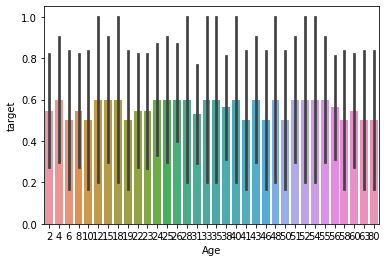

In [105]:
sns.barplot(dataset["Age"],y)

##### We notice,  are more likely to have age based detection

### Analysing the 'Blood Group' feature

In [106]:
dataset["Blood Group"].unique()

array(['A+', 'AB+', 'AB-', 'B+', 'O+', 'o+', 'B+ve', 'B +ve'],
      dtype=object)

##### As expected, the Blood Group feature has values from 0 to 3

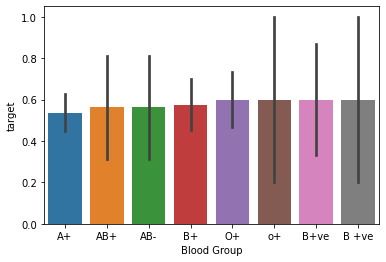

In [107]:
sns.barplot(dataset["Blood Group"],y)

##### We notice, that Blood Group of '0', i.e. the ones with typical angina are much less likely to have detect problems

### Analysing the dentist feature

In [108]:
dataset["Dentist"].describe()

count    293.000000
mean       0.549488
std        0.498396
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Dentist, dtype: float64

In [109]:
dataset["Dentist"].unique()

array([1, 0])

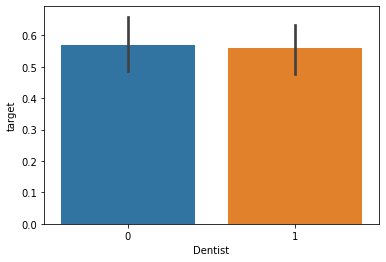

In [110]:
sns.barplot(dataset["Dentist"],y)

##### Nothing extraordinary here

### Analysing the Audiologist feature

In [111]:
dataset["Audiologist"].unique()

array([0, 1])

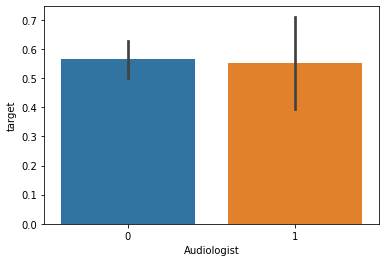

In [112]:
sns.barplot(dataset["Audiologist"],y)

##### We realize that people with diseases'1' and '0' are much more likely to have a heart disease than with  '2'

### Analysing the 'Paediatrician' feature

In [113]:
dataset["Paediatrician"].unique()

array([0, 1])

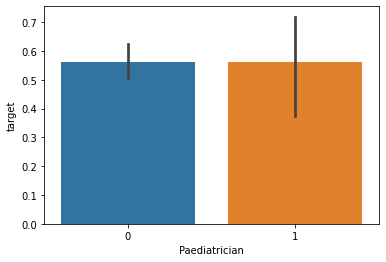

In [114]:
sns.barplot(dataset["Paediatrician"],y)

##### People with pulmono=1 i.e. Exercise induced  are much less likely to have detcet problems

### Analysing the Slope feature

In [115]:
dataset["Pulmonologist"].unique()

array([0, 1])

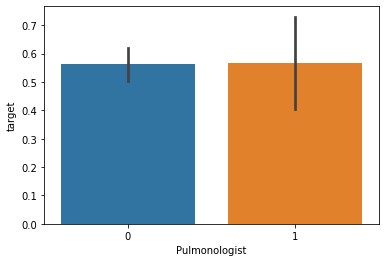

In [116]:
sns.barplot(dataset["Pulmonologist"],y)

### Analysing the 'ENT' feature

In [117]:
#number of major vessels (0-3) colored by flourosopy

In [118]:
dataset["ENT specialist"].unique()

array([1, 0])

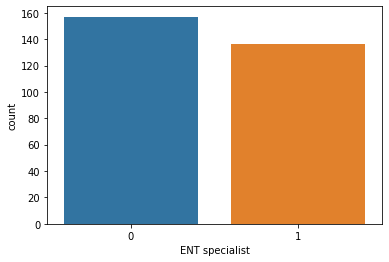

In [119]:
sns.countplot(dataset["ENT specialist"])

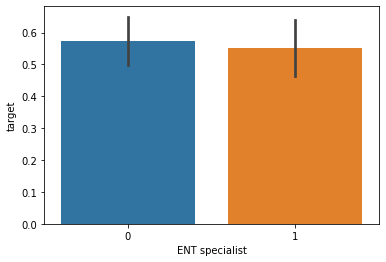

In [120]:
sns.barplot(dataset["ENT specialist"],y)

In [121]:
### Analysing the 'cardio' feature

In [122]:
dataset["Cardiothoracic surgeon"].unique()

array([0, 1])

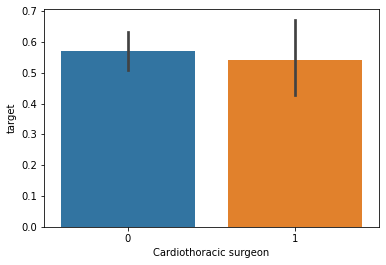

In [123]:
sns.barplot(dataset["Cardiothoracic surgeon"],y)

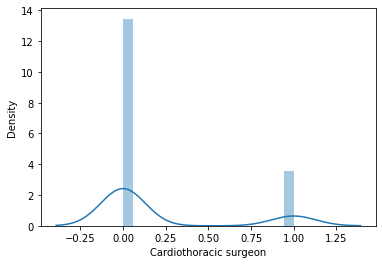

In [124]:
sns.distplot(dataset["Cardiothoracic surgeon"])

## IV. Train Test split

In [125]:
from google.colab import files
uploaded = files.upload()

Saving test1.csv to test1 (1).csv


In [126]:
import pandas as pd
dataset = pd.read_csv('test1.csv', encoding= 'unicode_escape')

In [127]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [128]:
X_train.shape

(234, 14)

In [129]:
X_test.shape

(59, 14)

In [130]:
Y_train.shape

(234,)

In [131]:
Y_test.shape

(59,)

## V. Model Fitting

In [132]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [134]:
Y_pred_lr.shape

(59,)

In [135]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 47.46 %


### Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [137]:
Y_pred_nb.shape

(59,)

In [138]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 49.15 %


### SVM

In [139]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [140]:
Y_pred_svm.shape

(59,)

In [141]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 47.46 %


### K Nearest Neighbors

In [142]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [143]:
Y_pred_knn.shape

(59,)

In [144]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 40.68 %


### Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [146]:
print(Y_pred_dt.shape)

(59,)


In [147]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 23.73 %


### Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [149]:
Y_pred_rf.shape

(59,)

In [150]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 35.59 %


### XGBoost

In [151]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [152]:
Y_pred_xgb.shape

(59,)

In [153]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 38.98 %


### Neural Network

In [154]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [155]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [156]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [158]:
model.add(tf.keras.layers.Dense(256, input_shape=(X_train.shape[1],), activation='sigmoid'))


## VI. Output final score

In [164]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using detecting diseases "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 47.46 %
The accuracy score achieved using Naive Bayes is: 49.15 %
The accuracy score achieved using Support Vector Machine is: 47.46 %
The accuracy score achieved using K-Nearest Neighbors is: 40.68 %
The accuracy score achieved using Decision Tree is: 23.73 %
The accuracy score achieved using Random Forest is: 35.59 %
The accuracy score achieved using XGBoost is: 38.98 %


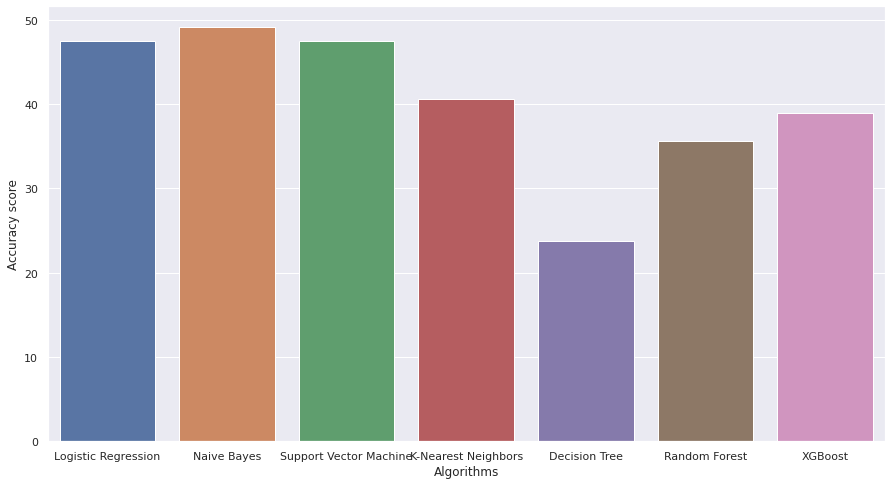

In [165]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)